# 사회팀 행정구역별 인구 대비 확진자 수 시각화

- 작성자: 이육샛별 


## 시각화 지도의 지역 ID와 행정구역별 인구, 확진자 수 데이터의 지역 ID 일치시키기 

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline 

In [ ]:
#한글 패치
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Cayley/최종-대분류-산업별-데이터-0.csv', index_col=0, encoding='utf-8')
df.head()

,산업분류,ID,지역,행정구역,인구 수,확진자 수,총사업체수,총종사자수,인구 대비 확진자 수,인구 대비 산업체 수,인구 대비 산업체 종사자 수,종사자수 대비 산업체 수
0,제조업(10~34),서울 종로,서울,종로구,157967,27,4437,13071,0.017092,2.808814,8.274513,33.945375
1,제조업(10~34),서울 중구,서울,중구,129797,18,9369,29402,0.013868,7.218195,22.652296,31.865179
2,제조업(10~34),서울 용산,서울,용산구,226938,53,964,3181,0.023354,0.424786,1.401704,30.304936
3,제조업(10~34),서울 성동,서울,성동구,306796,57,4444,27062,0.018579,1.448520,8.820845,16.421551
4,제조업(10~34),서울 광진,서울,광진구,362304,22,1707,7198,0.006072,0.471151,1.986729,23.714921


In [ ]:
df = df.drop(['산업분류', '지역','행정구역', '총사업체수', '총종사자수', '인구 대비 확진자 수', 
              '인구 대비 산업체 수', '인구 대비 산업체 종사자 수', '종사자수 대비 산업체 수'], axis=1)
df.head()

,ID,인구 수,확진자 수
0,서울 종로,157967,27
1,서울 중구,129797,18
2,서울 용산,226938,53
3,서울 성동,306796,57
4,서울 광진,362304,22


# **시각화 전처리**

In [ ]:
draw_korea = pd.read_csv('/content/drive/My Drive/Cayley/05. draw_korea.csv의 사본',
                         encoding='utf-8', 
                        index_col=0)
draw_korea.head()

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [ ]:
set(draw_korea['ID'].unique()) - set(df['ID'].unique())

{'고양 덕양',
 '고양 일산동',
 '고양 일산서',
 '부천 소사',
 '부천 오정',
 '부천 원미',
 '성남 분당',
 '성남 수정',
 '성남 중원',
 '수원 권선',
 '수원 영통',
 '수원 장안',
 '수원 팔달',
 '안산 단원',
 '안산 상록',
 '안양 동안',
 '안양 만안',
 '여주',
 '용인 기흥',
 '용인 수지',
 '용인 처인',
 '인천 남구',
 '전주 덕진',
 '전주 완산',
 '천안 동남',
 '천안 서북',
 '청주 상당',
 '청주 서원',
 '청주 청원',
 '청주 흥덕',
 '포항 남구',
 '포항 북구',
 '홍천'}

In [ ]:
set(df['ID'].unique()) - set(draw_korea['ID'].unique())

{'고양', '부천', '성남', '수원', '안산', '안양', '용인', '인천 미추홀', '전주', '천안', '청주', '포항'}

In [ ]:
df.tail()

,ID,인구 수,확진자 수
226,함양,38005,1
227,거창,60020,19
228,합천,42856,10
229,제주,482932,26
230,서귀포,175350,26


In [ ]:
a_a = df.loc[84, '인구 수']
b_a = df.loc[84, '확진자 수']
df.loc[231] = ['고양 덕양', a_a, b_a]
df.loc[232] = ['고양 일산동', a_a, b_a]
df[df['ID'] == '고양 덕양']
df.drop([84], inplace=True)

a_b = df.loc[79, '인구 수']
b_b = df.loc[79, '확진자 수']
df.loc[233] = ['부천 소사', a_b, b_b]
df.loc[234] = ['부천 오정', a_b, b_b]
df.loc[235] = ['부천 원미', a_b, b_b]
df.drop([79], inplace=True)

a_c = df.loc[76, '인구 수']
b_c = df.loc[76, '확진자 수']
df.loc[236] = ['성남 분당', a_c, b_c]
df.loc[237] = ['성남 수정', a_c, b_c]
df.loc[238] = ['성남 중원', a_c, b_c]
df.drop([76], inplace=True)

a_d = df.loc[75, '인구 수']
b_d = df.loc[75, '확진자 수']
df.loc[239] = ['수원 권선', a_d, b_d]
df.loc[240] = ['수원 영통', a_d, b_d]
df.loc[241] = ['수원 장안', a_d, b_d]
df.loc[242] = ['수원 팔달', a_d, b_d]
df.drop([75], inplace=True)

a_e = df.loc[83, '인구 수']
b_e = df.loc[83, '확진자 수']
df.loc[243] = ['안산 단원', a_e, b_e]
df.loc[244] = ['안산 상록', a_e, b_e]
df.drop([83], inplace=True)

a_f = df.loc[78, '인구 수']
b_f = df.loc[78, '확진자 수']
df.loc[245] = ['안양 동안', a_f, b_f]
df.loc[246] = ['안양 만안', a_f, b_f]
df.drop([78], inplace=True)

a_g = df.loc[93, '인구 수']
b_g = df.loc[93, '확진자 수']
df.loc[247] = ['용인 기흥', a_g, b_g]
df.loc[248] = ['용인 수지', a_g, b_g]
df.loc[249] = ['용인 처인', a_c, b_c]
df.drop([93], inplace=True)

a_h = df.loc[148, '인구 수']
b_h = df.loc[148, '확진자 수']
df.loc[250] = ['전주 덕진', a_f, b_h]
df.loc[251] = ['전주 완산', a_f, b_h]
df.drop([148], inplace=True)

a_i = df.loc[133, '인구 수']
b_i = df.loc[133, '확진자 수']
df.loc[252] = ['천안 동남', a_i, b_i]
df.loc[253] = ['천안 서북', a_i, b_i]
df.drop([133], inplace=True)

a_j = df.loc[124, '인구 수']
b_j = df.loc[124, '확진자 수']
df.loc[254] = ['청주 상당', a_j, b_j]
df.loc[255] = ['청주 서원', a_j, b_j]
df.loc[256] = ['청주 청원', a_j, b_j]
df.loc[257] = ['청주 흥덕', a_j, b_j]
df.drop([124], inplace=True)

a_k = df.loc[184, '인구 수']
b_k = df.loc[184, '확진자 수']
df.loc[258] = ['포항 남구', a_k, b_k]
df.loc[259] = ['포항 북구', a_k, b_k]
df.drop([184], inplace=True)

a_l= df.loc[231, '인구 수']
b_l= df.loc[231, '확진자 수']
df.loc[260] = ['고양 일산서', a_l, b_l]

df.loc[56] = ['인천 남구', '41502', '72']

In [ ]:
set(draw_korea['ID'].unique()) - set(df['ID'].unique())

{'고양 일산서', '여주', '인천 남구', '홍천'}

In [ ]:
set(df['ID'].unique()) - set(draw_korea['ID'].unique())

{'인천 미추홀'}

In [ ]:
df[df['ID'] == '인천 미추홀']

,ID,인구 수,확진자 수
56,인천 미추홀,415102,72


In [ ]:
df.loc[56] = ['인천 남구', '41502', '72']
df[df['ID'] == '인천 남구']

,ID,인구 수,확진자 수
56,인천 남구,41502,72


In [ ]:
df[df['ID'] == '여주']

,ID,인구 수,확진자 수


In [ ]:
df.loc[261] = ['여주', '112096', '2']
df.loc[262] = ['홍천', '67177' , '0']

In [ ]:
set(draw_korea['ID'].unique()) - set(df['ID'].unique())

set()

In [ ]:
set(df['ID'].unique()) - set(draw_korea['ID'].unique())

set()

In [ ]:
draw_korea_drop_row = draw_korea.dropna(axis=0)

In [ ]:
df = df.astype({'인구 수': int,
                  '확진자 수': int})

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 0 to 262
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      252 non-null    object
 1   인구 수    252 non-null    int64 
 2   확진자 수   252 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.9+ KB


In [ ]:
df2.head()

,ID,인구 수,확진자 수
0,서울 종로,157967,27
1,서울 중구,129797,18
2,서울 용산,226938,53
3,서울 성동,306796,57
4,서울 광진,362304,22


In [ ]:
df2['인구 대비 확진자수'] = df2['확진자 수'] / df2['인구 수']
df2.head()

,ID,인구 수,확진자 수,인구 대비 확진자수
0,서울 종로,157967,27,0.000171
1,서울 중구,129797,18,0.000139
2,서울 용산,226938,53,0.000234
3,서울 성동,306796,57,0.000186
4,서울 광진,362304,22,0.000061


In [ ]:
final = pd.merge(df2, draw_korea, how='left', on=['ID'])
final.head()

,ID,인구 수,확진자 수,인구 대비 확진자수,y,x
0,서울 종로,157967,27,0.000171,4,6
1,서울 중구,129797,18,0.000139,5,6
2,서울 용산,226938,53,0.000234,6,6
3,서울 성동,306796,57,0.000186,5,7
4,서울 광진,362304,22,0.000061,6,7


In [ ]:
final.sort_values(by='인구 대비 확진자수', ascending=True). head()

,ID,인구 수,확진자 수,인구 대비 확진자수,y,x
251,홍천,67177,0,0.0,2,8
171,완도,48340,0,0.0,25,2
170,장성,41850,0,0.0,19,2
165,해남,66209,0,0.0,23,0
164,강진,33298,0,0.0,24,1


In [ ]:
final.to_csv('인구 대비 확진자수', encoding='utf-8')

# **시각화**

In [ ]:
BORDER_LINES = [
    [(5, 1), (5,2), (7,2), (7,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), 
     (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), 
     (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4), 
     (11,4), (11,3)], # 경기도
    [(8,10), (8,11), (6,11), (6,12)], # 강원도
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), 
     (15,4), (16,4), (16,2)], # 충청북도
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), 
     (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도
    [(13,5), (13,6), (16,6)], # 대전시
    [(13,5), (14,5)], #세종시
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], #울산
    [(27,5), (27,6), (25,6)],
]

In [ ]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = 20.

    datalabel = targetData

    tmp_max = max([ np.abs(min(blockedMap[targetData])), 
                                  np.abs(max(blockedMap[targetData]))])
    vmin, vmax = -tmp_max, tmp_max

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if np.abs(row[targetData]) > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()
    plt.savefig('인구 대비 확진자수.png')

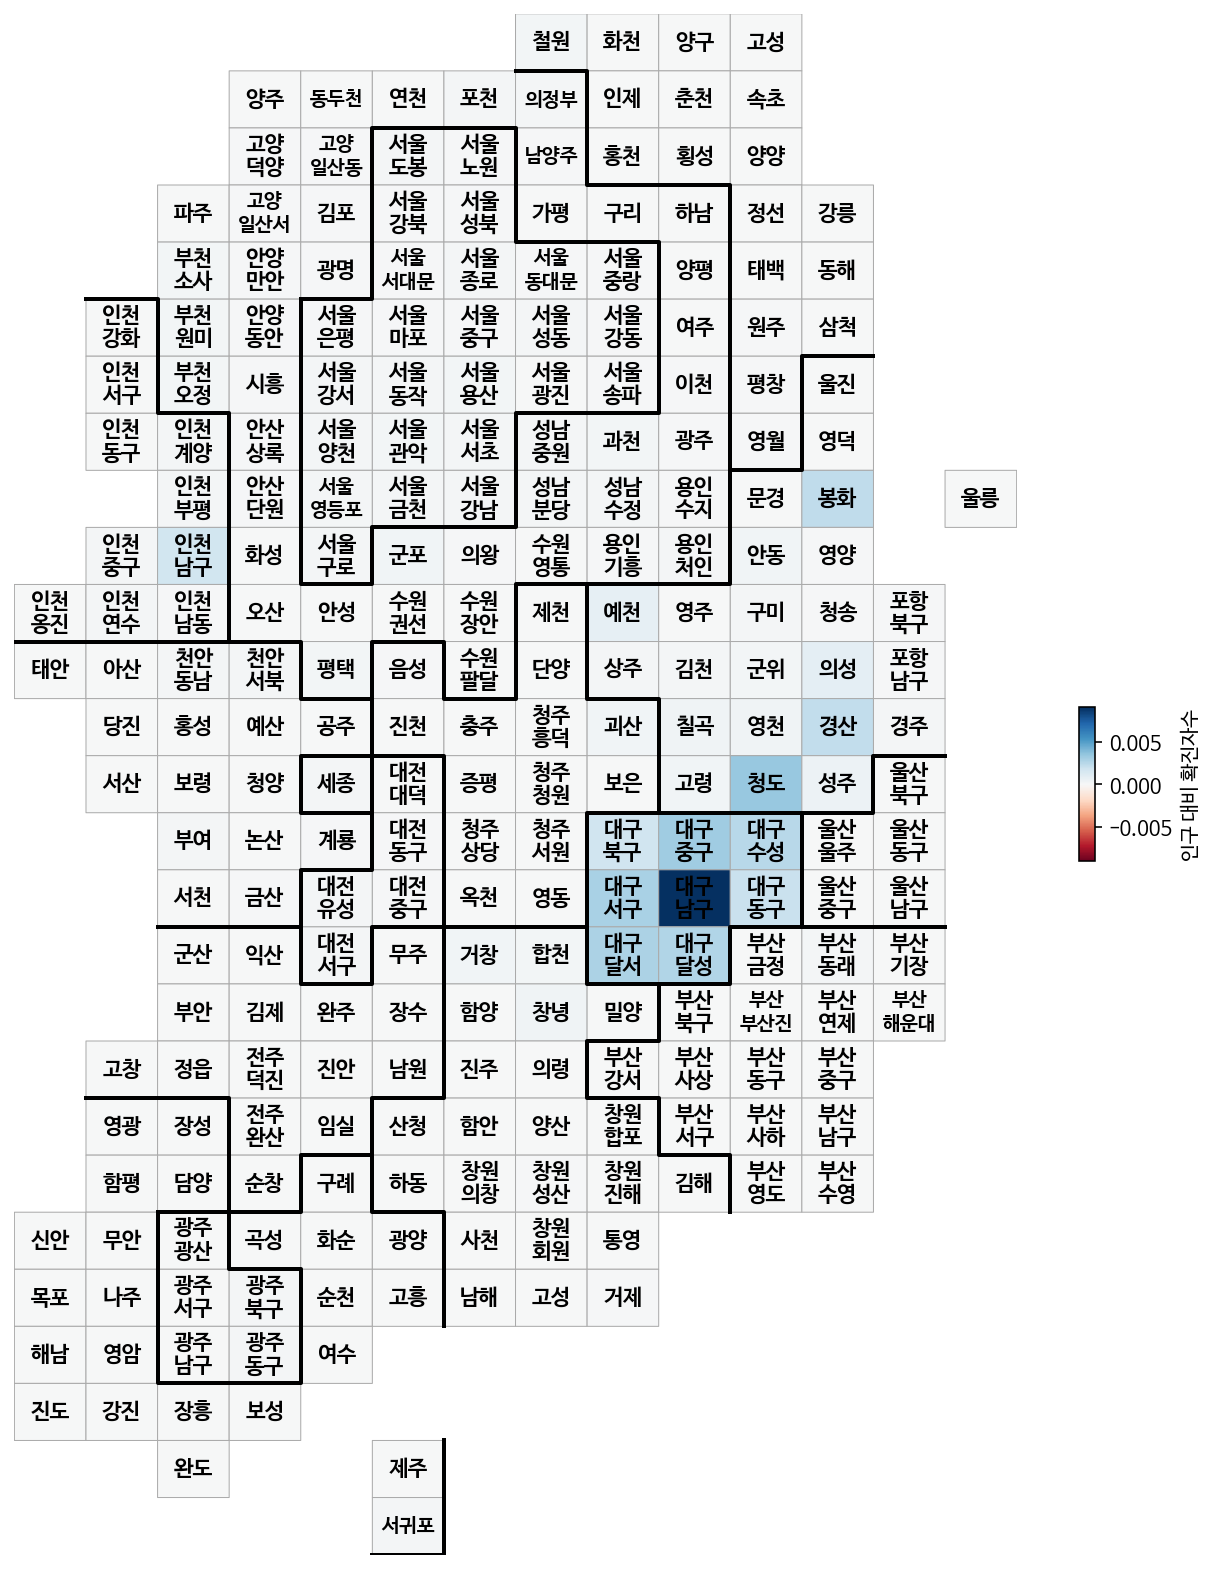

<Figure size 432x288 with 0 Axes>

In [ ]:
drawKorea('인구 대비 확진자수', final, 'RdBu')
plt.savefig('인구 대비 확진자수.png')